explain pca intuitively with code some code snipper and very simple exmaple

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

# Understanding PCA Intuitively

Principal Component Analysis (PCA) is a technique that helps us simplify complex data while keeping the most important information. Let me explain it with a simple analogy:

Imagine you have photos of faces, and you want to describe them efficiently. Instead of specifying every pixel, you might say things like "this face has a wide smile" or "this face has a big nose." These descriptions are like the "principal components" - they capture the main ways faces differ from each other.

Would you like me to show you a simple example with code to make this clearer?

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's create a simple example to demonstrate PCA.

First, let's generate some 2D data that has a clear pattern - points that roughly form a diagonal line with some random variation. Then we'll apply PCA to find the principal components.

Here's how you could set this up:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create sample data - points roughly along a diagonal line
np.random.seed(42)
n_samples = 50
# Generate x values
x = np.random.uniform(-5, 5, n_samples)
# Generate y values correlated with x, plus some noise
y = 0.8 * x + np.random.normal(0, 1, n_samples)

# Combine into a single dataset
data = np.column_stack((x, y))

# Let's visualize our original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
```

Would you like to try running this code first to see the data we're working with? Then we can proceed with applying PCA to it.

use torch please instead of numpy

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Sure, let's rewrite the example using PyTorch instead of NumPy. Here's how you can generate the data and visualize it using PyTorch:

```python
import torch
import matplotlib.pyplot as plt

# Create sample data - points roughly along a diagonal line
torch.manual_seed(42)
n_samples = 50
# Generate x values
x = torch.rand(n_samples) * 10 - 5  # Values between -5 and 5
# Generate y values correlated with x, plus some noise
y = 0.8 * x + torch.randn(n_samples)

# Combine into a single dataset
data = torch.stack((x, y), dim=1)

# Let's visualize our original data
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
```

Would you like to run this code first to see the data? Then we can implement PCA using PyTorch.

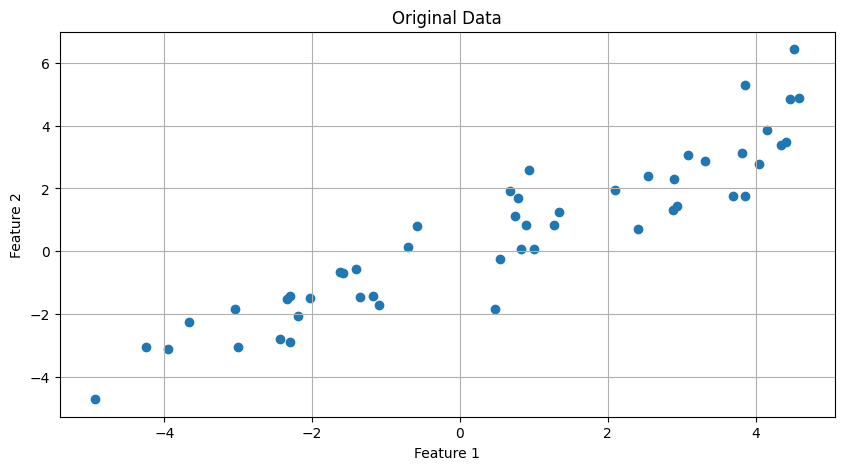

In [ ]:
import torch
import matplotlib.pyplot as plt

# Create sample data - points roughly along a diagonal line
torch.manual_seed(42)
n_samples = 50
# Generate x values
x = torch.rand(n_samples) * 10 - 5  # Values between -5 and 5
# Generate y values correlated with x, plus some noise
y = 0.8 * x + torch.randn(n_samples)

# Combine into a single dataset
data = torch.stack((x, y), dim=1)

# Let's visualize our original data
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [ ]:
data.shape

torch.Size([50, 2])

In [ ]:
x.shape

torch.Size([50])

In [ ]:
y.shape

torch.Size([50])

In [ ]:
torch.stack((x, y)).shape

torch.Size([2, 50])

next part please...

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now that we have our data visualized, we can implement PCA using PyTorch. Let's go through it step by step:

```python
# Step 1: Center the data by subtracting the mean
data_mean = torch.mean(data, dim=0)
data_centered = data - data_mean

# Step 2: Compute the covariance matrix
cov_matrix = torch.mm(data_centered.T, data_centered) / (data_centered.shape[0] - 1)

# Step 3: Compute eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)

# Sort eigenvectors by decreasing eigenvalues
indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

# Visualize the principal components
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.title('Data with Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the principal components as vectors from the mean
for i in range(2):
    plt.arrow(data_mean[0], data_mean[1], 
              eigenvectors[0, i] * eigenvalues[i] * 0.5, 
              eigenvectors[1, i] * eigenvalues[i] * 0.5,
              head_width=0.3, head_length=0.3, fc='red', ec='red')
plt.grid(True)
plt.show()
```

This code:
1. Centers the data by subtracting the mean
2. Computes the covariance matrix
3. Finds the eigenvectors and eigenvalues (which become our principal components)
4. Visualizes the principal components as arrows showing their direction and magnitude

Would you like to run this code to see the principal components?

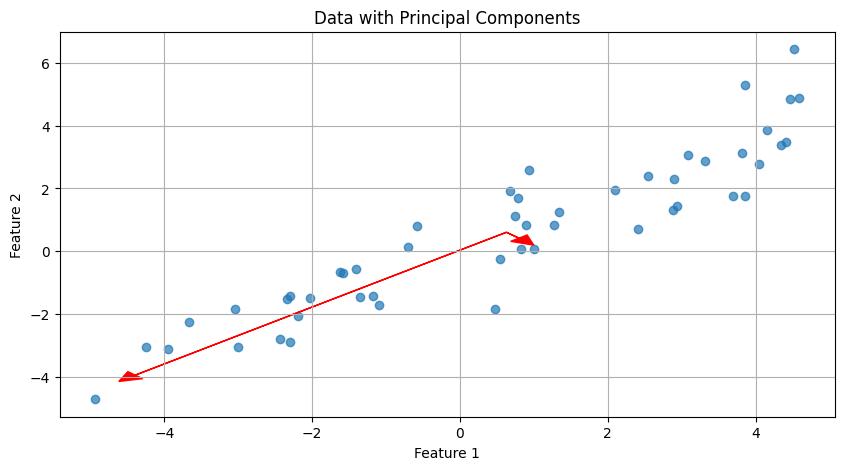

In [ ]:
# Step 1: Center the data by subtracting the mean
data_mean = torch.mean(data, dim=0)
data_centered = data - data_mean

# Step 2: Compute the covariance matrix
cov_matrix = torch.mm(data_centered.T, data_centered) / (data_centered.shape[0] - 1)

# Step 3: Compute eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)

# Sort eigenvectors by decreasing eigenvalues
indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

# Visualize the principal components
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.title('Data with Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the principal components as vectors from the mean
for i in range(2):
    plt.arrow(data_mean[0], data_mean[1], 
              eigenvectors[0, i] * eigenvalues[i] * 0.5, 
              eigenvectors[1, i] * eigenvalues[i] * 0.5,
              head_width=0.3, head_length=0.3, fc='red', ec='red')
plt.grid(True)
plt.show()


make code simple and concise use fastai code style..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's a more concise version of the PCA implementation using a more FastAI-like coding style:

```python
# Simplified PCA implementation with FastAI-like style
data_mean = data.mean(0)
data_centered = data - data_mean

# Compute covariance and get eigenvectors
cov = data_centered.T @ data_centered / (len(data_centered) - 1)
eigenvalues, eigenvectors = torch.linalg.eigh(cov)

# Sort in descending order
idx = eigenvalues.argsort(descending=True)
eigenvalues, eigenvectors = eigenvalues[idx], eigenvectors[:, idx]

# Project data onto principal components
pca_data = data_centered @ eigenvectors

# Plot original data and principal components
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data[:, 0], data[:, 1], alpha=0.7)
ax.arrow(data_mean[0], data_mean[1], 
         eigenvectors[0, 0] * eigenvalues[0] * 0.5,
         eigenvectors[1, 0] * eigenvalues[0] * 0.5,
         head_width=0.3, color='red')
ax.set(title='Data with First Principal Component', xlabel='Feature 1', ylabel='Feature 2')
ax.grid(True)
```

This version:
- Uses more concise operations like `@` for matrix multiplication
- Removes unnecessary loops
- Focuses on just the first principal component for clarity
- Uses more compact plotting syntax

Would you like me to explain what each line does or would you prefer to see the result?

no comments..please..

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the clean, uncommented version:

```python
data_mean = data.mean(0)
data_centered = data - data_mean

cov = data_centered.T @ data_centered / (len(data_centered) - 1)
eigenvalues, eigenvectors = torch.linalg.eigh(cov)

idx = eigenvalues.argsort(descending=True)
eigenvalues, eigenvectors = eigenvalues[idx], eigenvectors[:, idx]

pca_data = data_centered @ eigenvectors

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data[:, 0], data[:, 1], alpha=0.7)
ax.arrow(data_mean[0], data_mean[1], 
         eigenvectors[0, 0] * eigenvalues[0] * 0.5,
         eigenvectors[1, 0] * eigenvalues[0] * 0.5,
         head_width=0.3, color='red')
ax.set(title='Data with First Principal Component', xlabel='Feature 1', ylabel='Feature 2')
ax.grid(True)
```

Would you like to see the result or do you need any other modifications?

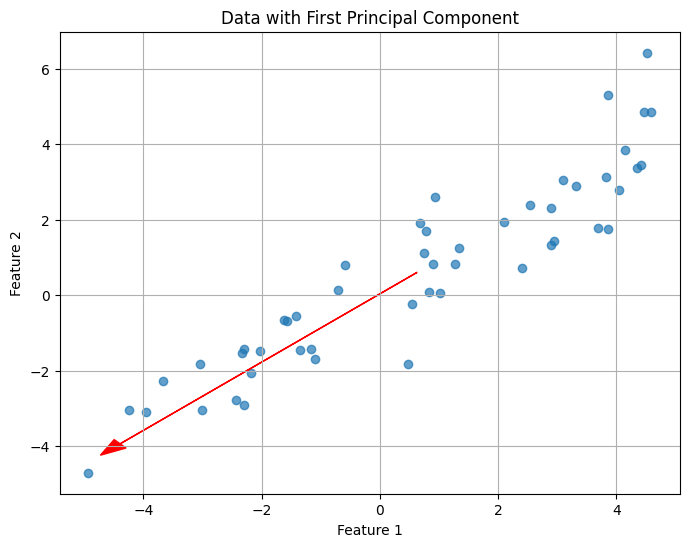

In [ ]:
data_mean = data.mean(0)
data_centered = data - data_mean

cov = data_centered.T @ data_centered / (len(data_centered) - 1)
eigenvalues, eigenvectors = torch.linalg.eigh(cov)

idx = eigenvalues.argsort(descending=True)
eigenvalues, eigenvectors = eigenvalues[idx], eigenvectors[:, idx]

pca_data = data_centered @ eigenvectors

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data[:, 0], data[:, 1], alpha=0.7)
ax.arrow(data_mean[0], data_mean[1], 
         eigenvectors[0, 0] * eigenvalues[0] * 0.5,
         eigenvectors[1, 0] * eigenvalues[0] * 0.5,
         head_width=0.3, color='red')
ax.set(title='Data with First Principal Component', xlabel='Feature 1', ylabel='Feature 2')
ax.grid(True)


In [ ]:
data

tensor([[ 3.8227,  3.1362],
        [ 4.1500,  3.8458],
        [-1.1714, -1.4251],
        [ 4.5931,  4.8658],
        [-1.0955, -1.6904],
        [ 1.0090,  0.0712],
        [-2.4343, -2.7845],
        [ 2.9364,  1.4267],
        [ 4.4077,  3.4627],
        [-3.6681, -2.2589],
        [ 4.3460,  3.3790],
        [ 0.9358,  2.5932],
        [ 3.6940,  1.7707],
        [ 0.6772,  1.9253],
        [ 2.4109,  0.7263],
        [-0.7060,  0.1430],
        [ 3.8544,  5.3016],
        [ 0.7390,  1.1144],
        [-2.3342, -1.5207],
        [ 1.2745,  0.8223],
        [-2.3037, -2.8975],
        [-0.5864,  0.8089],
        [-2.0308, -1.4793],
        [ 3.3169,  2.8845],
        [-3.9469, -3.1009],
        [-2.3051, -1.4177],
        [-1.4119, -0.5545],
        [-3.0064, -3.0468],
        [ 0.4719, -1.8289],
        [-4.9384, -4.7015],
        [ 4.5155,  6.4265],
        [-4.2473, -3.0381],
        [ 3.8601,  1.7474],
        [ 0.8321,  0.0803],
        [-1.6235, -0.6581],
        [ 3.0898,  3

In [ ]:
import pandas as pd
# pd.Dataframe(data)

In [ ]:
pd.DataFrame(data,columns=['x','y'])

,x,y
0,3.822693,3.136178
1,4.150040,3.845841
2,-1.171362,-1.425082
3,4.593057,4.865814
4,-1.095518,-1.690422
5,1.008954,0.071170
6,-2.434275,-2.784545
7,2.936413,1.426741
8,4.407715,3.462695
9,-3.668141,-2.258898


img =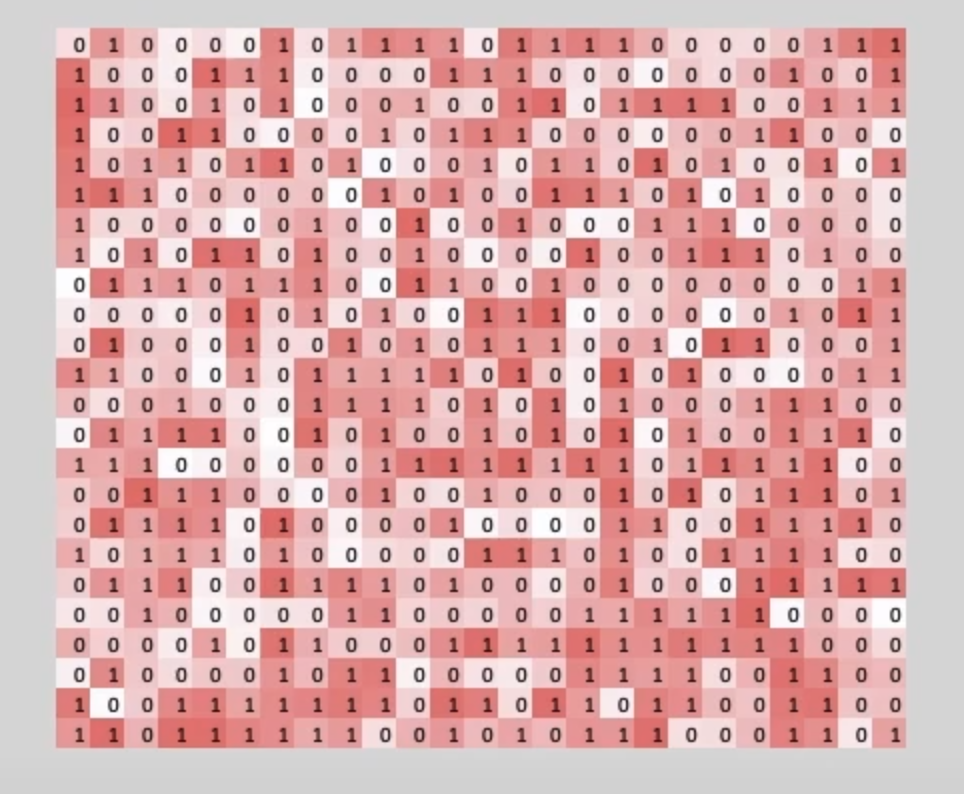

 `$img`  explain me that image.. forget what i have done before.. this is new thing 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at the image, it shows a scatter plot of 2D data points with a red arrow representing the first principal component.

The data points (in blue) are distributed in a pattern that trends from the bottom-left to the top-right of the plot. This indicates a positive correlation between Feature 1 (x-axis) and Feature 2 (y-axis).

The red arrow shows the direction of maximum variance in the data - this is the first principal component. It points along the main "trend" of the data points, capturing the primary pattern of variation. This principal component essentially represents the line that best fits the data in terms of explaining the most variance.

If you were to project all these points onto this red line (the first principal component), you would preserve as much of the original variation in the data as possible with just one dimension. This is the fundamental concept of PCA - finding the directions (components) that capture the most information in your data.

The length of the arrow also indicates the relative importance of this component - longer arrows represent components that explain more variance in the dataset.

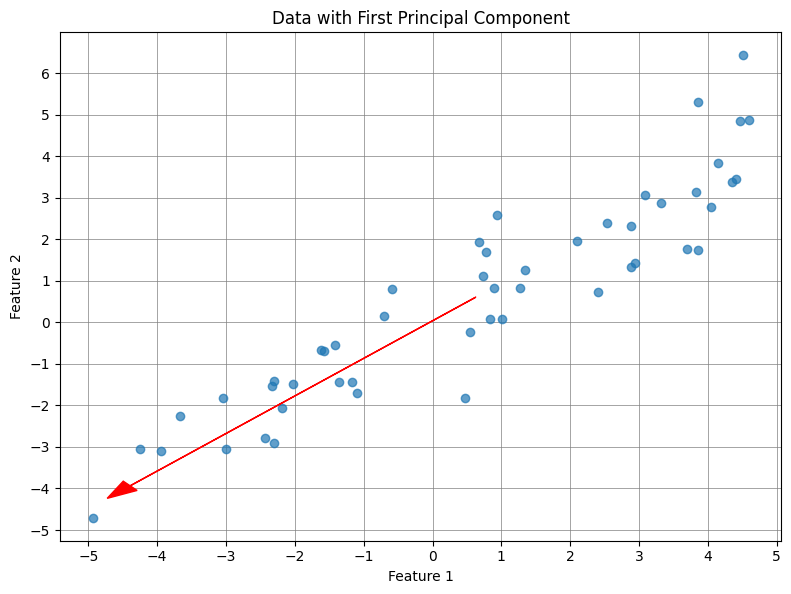

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data[:, 0], data[:, 1], alpha=0.7)
ax.arrow(data_mean[0], data_mean[1], 
         eigenvectors[0, 0] * eigenvalues[0] * 0.5,
         eigenvectors[1, 0] * eigenvalues[0] * 0.5,
         head_width=0.3, color='red')
ax.set(title='Data with First Principal Component', xlabel='Feature 1', ylabel='Feature 2')
ax.grid(True)

# Add grid with specific styling
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='-', linewidth=0.5)

# Adjust grid lines to be evenly spaced
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 7, 1))

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np